# Tennis Matches Exploratory Data Analysis

## Objective: Obtaining insights from the world of tennis

### Importing necessary libraries and the datasets

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

In [98]:
plt.style.use("ggplot")

In [99]:
match_awayteam = pd.read_csv("tennis_data/csv-file/match_awayteam_df.csv")
match_awayteam.head()

,match_id,name,slug,gender,user_count,residence,birthplace,height,weight,plays,turned_pro,current_prize,total_prize,player_id,current_rank,name_code,country,full_name
0,11673958,Tirante T.,tirante-thiago-agustin,M,1519,La Plata,"La Plata, Argentina",1.85,78.0,right-handed,NaN,249335.0,430793.0,221515,123.0,TIR,Argentina,"Tirante, Thiago Agustin"
1,11673962,Heide G.,heide-gustavo,M,1177,NaN,Sao Paulo,1.88,NaN,right-handed,NaN,36929.0,87230.0,302582,247.0,HEI,Brazil,"Heide, Gustavo"
2,11673963,Jorda Sanchis D.,jorda-sanchis-david,M,344,Spain,"Barcelona, Spain",1.98,83.0,right-handed,NaN,27028.0,72338.0,57155,331.0,JOR,Spain,"Jorda Sanchis, David"
3,11673993,Roca Batalla O.,roca-batalla-oriol,M,707,Santa Coloma de Gramenet,Barcelona,1.75,75.0,right-handed,NaN,53418.0,317311.0,51100,213.0,ROC,Spain,"Roca Batalla, Oriol"
4,11674000,Crawford O.,crawford-oliver,M,442,"Spartanburg, SC","Spartanburg, SC, USA",1.80,84.0,right-handed,NaN,40191.0,113045.0,213057,215.0,CRA,USA,"Crawford, Oliver"


In [100]:
match_hometeam = pd.read_csv("tennis_data/csv-file/match_hometeam_df.csv")
match_hometeam.head()

,match_id,name,slug,gender,user_count,residence,birthplace,height,weight,plays,turned_pro,current_prize,total_prize,player_id,current_rank,name_code,country,full_name
0,11673958,Barrios Vera T.,barrios-vera-tomas,M,2915,Santiago,"Chillan, Chile",1.91,83.0,right-handed,2014.0,265608.0,646273.0,132834,103.0,BAR,Chile,"Barrios Vera, Tomás"
1,11673962,Tirante T.,tirante-thiago-agustin,M,1519,La Plata,"La Plata, Argentina",1.85,78.0,right-handed,NaN,249335.0,430793.0,221515,123.0,TIR,Argentina,"Tirante, Thiago Agustin"
2,11673963,Heide G.,heide-gustavo,M,1177,NaN,Sao Paulo,1.88,NaN,right-handed,NaN,36929.0,87230.0,302582,247.0,HEI,Brazil,"Heide, Gustavo"
3,11673993,Ajduković D.,ajdukovic-duje,M,1293,"Zagreb, Croatia","Split, Croatia",1.88,75.0,right-handed,NaN,63678.0,198866.0,207081,143.0,AJD,Croatia,"Ajduković, Duje"
4,11674000,Escobedo E.,escobedo-ernesto,M,680,"West Covina, CA, USA","Los Angeles, CA, USA",1.85,82.0,right-handed,2014.0,84375.0,1280430.0,80491,404.0,ESC,Mexico,"Escobedo, Ernesto"


In [101]:
match_event = pd.read_csv("tennis_data/csv-file/match_event_df.csv")
match_event.head()

,match_id,first_to_serve,home_team_seed,away_team_seed,custom_id,winner_code,default_period_count,start_datetime,match_slug,final_result_only
0,11673958,NaN,1,4,JgdbspFNb,2.0,3,1696094700,tirante-barrios-vera,False
1,11673962,NaN,4,NaN,pFNbsHbwc,1.0,3,1696176000,heide-tirante,False
2,11673963,NaN,NaN,NaN,fTxsHbwc,1.0,3,1696087800,heide-jorda-sanchis,False
3,11673993,NaN,NaN,Q,axvsGQHb,2.0,3,1696154400,ajdukovic-roca-batalla,False
4,11674000,NaN,Q,WC,QjHshlKb,2.0,3,1696086000,crawford-escobedo,False


In [102]:
match_time = pd.read_csv("tennis_data/csv-file/match_time_df.csv")
match_time.head()

,match_id,period_1,period_2,period_3,period_4,period_5,current_period_start_timestamp
0,11673958,1960.0,2457.0,NaN,NaN,NaN,1.696098e+09
1,11673962,NaN,NaN,NaN,NaN,NaN,1.696177e+09
2,11673963,3403.0,2431.0,NaN,NaN,NaN,1.696092e+09
3,11673993,2894.0,2309.0,2084.0,NaN,NaN,1.696160e+09
4,11674000,3177.0,NaN,NaN,NaN,NaN,1.696090e+09


In [103]:
statistics = pd.read_csv("tennis_data/csv-file/statistics_df.csv")
statistics.head()

,match_id,period,statistic_category_name,statistic_name,home_stat,away_stat,compare_code,statistic_type,value_type,home_value,away_value,home_total,away_total
0,11674074,ALL,service,aces,1,2,2,positive,event,1,2,NaN,NaN
1,11674074,ALL,service,double_faults,1,3,2,negative,event,1,3,NaN,NaN
2,11674074,ALL,service,first_serve,34/52 (65%),26/57 (46%),1,positive,team,34,26,52.0,57.0
3,11674074,ALL,service,second_serve,17/18 (94%),28/31 (90%),1,positive,team,17,28,18.0,31.0
4,11674074,ALL,service,first_serve_points,25/34 (74%),11/26 (42%),1,positive,team,25,11,34.0,26.0


In [104]:
power = pd.read_csv("tennis_data/csv-file/power_df.csv")
power.head()

,match_id,set_num,game_num,value,break_occurred
0,11674074,1,1,30.50,False
1,11674074,1,2,81.10,True
2,11674074,1,3,51.60,False
3,11674074,1,4,-33.80,False
4,11674074,1,5,-59.88,True


In [105]:
match_tournament = pd.read_csv("tennis_data/csv-file/match_tournament_df.csv")
match_tournament.head()

,match_id,tournament_id,tournament_name,tournament_slug,tournament_unique_id,tournament_category_name,tournament_category_slug,user_count,ground_type,tennis_points,has_event_player_statistics,crowd_sourcing_enabled,has_performance_graph_feature,display_inverse_home_away_teams,priority,competition_type
0,11673958,121441,"Bogota, Colombia",bogota-colombia,NaN,Challenger,challenger,125,Red clay,125.0,False,False,False,False,0,2
1,11673962,121441,"Bogota, Colombia",bogota-colombia,NaN,Challenger,challenger,125,Red clay,125.0,False,False,False,False,0,2
2,11673963,121441,"Bogota, Colombia",bogota-colombia,NaN,Challenger,challenger,125,Red clay,125.0,False,False,False,False,0,2
3,11673993,121451,"Braga, Portugal",braga-portugal,NaN,Challenger,challenger,163,Red clay,75.0,False,False,False,False,0,2
4,11674000,121453,"Charleston, USA",charleston-usa,NaN,Challenger,challenger,71,Hardcourt outdoor,75.0,False,False,False,False,0,2


In [106]:
match_round = pd.read_csv("tennis_data/csv-file/match_round_df.csv")
match_round.head()

,match_id,round_id,name,slug,cup_round_type
0,11673958,28,Semifinal,semifinal,2.0
1,11673962,29,Final,final,1.0
2,11673963,28,Semifinal,semifinal,2.0
3,11673993,29,Final,final,1.0
4,11674000,28,Semifinal,semifinal,2.0


In [107]:
match_venue = pd.read_csv("tennis_data/csv-file/match_venue_df.csv")
match_venue.head()

,match_id,city,stadium,venue_id,country
0,11673958,Bogota,Cancha Central,18338,Colombia
1,11673962,Bogota,Cancha Central,18338,Colombia
2,11673963,Bogota,Cancha Central,18338,Colombia
3,11673993,Braga,Court Central,21510,Portugal
4,11674000,Charleston,Center Court,32522,USA


In [108]:
odds = pd.read_csv("tennis_data/csv-file/odds_df.csv")
odds.head()

,match_id,market_id,market_name,is_live,suspended,initial_fractional_value,fractional_value,choice_name,choice_source_id,winnig,change
0,11673958,1,full_time,False,False,73/100,83/100,1,1349454568,False,1
1,11673958,1,full_time,False,False,1/1,83/100,2,1349454681,True,-1
2,11673958,11,first_set_winner,False,False,8/11,5/6,1,1349620691,False,1
3,11673958,11,first_set_winner,False,False,1/1,5/6,2,1349620754,True,-1
4,11673958,12,total_games_won,False,False,4/5,4/5,Over,1349620653,False,0


## 1. How many tennis players are included in the dataset?

Let's determine by concatenating the `match_awayteam` and `match_hometeam` DataFrames and removing duplicate entries based on the `player_id` column.

In [109]:
all_players = pd.concat([match_awayteam,match_hometeam], axis="rows", ignore_index=True).drop_duplicates(subset="player_id")
len(all_players)

596

The dataset contains information about **596 unique tennis players**.

# 2. What is the average age of the players?


The dataset does not include explicit age information for the players, so this question cannot be answered with the available data

# 3. Which player has the highest number of wins?


Let's obtain the result by analyzing the `winner_code` column in the `match_event` DataFrame and merging it with player information from `match_hometeam` and `match_awayteam`. 

In [110]:
homwteam_won = match_event[match_event["winner_code"] == 1]
awayteam_won = match_event[match_event["winner_code"] == 2]

winners1 = match_hometeam[match_hometeam["match_id"].isin(homwteam_won["match_id"])]
winners2 = match_awayteam[match_awayteam["match_id"].isin(awayteam_won["match_id"])]

all_winners = pd.concat([winners1, winners2])
all_winners.head()

,match_id,name,slug,gender,user_count,residence,birthplace,height,weight,plays,turned_pro,current_prize,total_prize,player_id,current_rank,name_code,country,full_name
1,11673962,Tirante T.,tirante-thiago-agustin,M,1519,La Plata,"La Plata, Argentina",1.85,78.0,right-handed,NaN,249335.0,430793.0,221515,123.0,TIR,Argentina,"Tirante, Thiago Agustin"
2,11673963,Heide G.,heide-gustavo,M,1177,NaN,Sao Paulo,1.88,NaN,right-handed,NaN,36929.0,87230.0,302582,247.0,HEI,Brazil,"Heide, Gustavo"
5,11674008,Shelbayh A.,shelbayh-abedallah,M,1411,NaN,Amman,1.80,NaN,NaN,NaN,104721.0,128500.0,307383,187.0,SHE,Jordan,"Shelbayh, Abedallah"
8,11674032,Machač T.,machac-tomas,M,2381,Czech republic,"Beroun, Czech Republic",1.83,73.0,right-handed,NaN,358816.0,873971.0,238300,78.0,MAC,Czech Republic,"Machač, Tomáš"
9,11674034,Draper J.,draper-jack,M,5892,London,"Sutton, England",1.93,75.0,left-handed,2018.0,614923.0,1519143.0,258749,61.0,DRA,United Kingdom,"Draper, Jack"


Now we have the winner of each match in `all_winners`.    
Let's calculate the number of wins for each  player and find the highest number of wins.

In [111]:
win_count = all_winners.groupby(["full_name","name_code"]).size().sort_values(ascending=False).reset_index(name="win_count")
win_count.head()

,full_name,name_code,win_count
0,"Milushev, Plamen",MIL,3
1,"Panaras, Adam",PAN,3
2,"Kalina, Vit",KAL,3
3,"Mouilleron Salvo, Manuel",MOU,2
4,"Fery, Arthur",FER,2


The players with the highest number of wins are:

- **Milushev, Plamen** (3 wins)

- **Panaras, Adam** (3 wins)

- **Kalina, Vit** (3 wins)

# 4. What is the longest match recorded in terms of duration?


Let's calculate The duration by summing the periods in the `match_time` DataFrame.

In [112]:
cleaned_match_time = match_time.fillna(0)

In [113]:
total_time = cleaned_match_time.iloc[:,1:6].sum(axis=1).sort_values(ascending=False).reset_index(name="time")
total_time = total_time.merge(cleaned_match_time,left_on="index",right_on=cleaned_match_time.index)
total_time.head()

,index,time,match_id,period_1,period_2,period_3,period_4,period_5,current_period_start_timestamp
0,331,12835.0,11699235,3438.0,4379.0,5018.0,0.0,0.0,1.696178e+09
1,39,11123.0,11697113,4280.0,3485.0,3358.0,0.0,0.0,1.696175e+09
2,300,11060.0,11699173,2875.0,3657.0,4528.0,0.0,0.0,1.696173e+09
3,36,10795.0,11697108,3675.0,3706.0,3414.0,0.0,0.0,1.696137e+09
4,24,10650.0,11675448,1995.0,3777.0,4878.0,0.0,0.0,1.696148e+09


The longest match recorded lasted **12,835 seconds (approximately 3 hours, 33 minutes, and 55 seconds)**. This match occurred between **Weis Alexander** and **Domingues Joao** (match ID: `11699235`).

# 5. How many sets are typically played in a tennis match?

Let's derive by counting the non-zero period columns in the `match_time` DataFrame and summarizing the results.

In [114]:
count_sets = match_time.iloc[:,1:6].count(axis=1)
count_sets = count_sets[count_sets != 0]
count_sets.describe().reset_index(name="statistics")

,index,statistics
0,count,320.000000
1,mean,2.331250
2,std,0.478004
3,min,1.000000
4,25%,2.000000
5,50%,2.000000
6,75%,3.000000
7,max,3.000000


- **Minimum sets played**: 1

- **Maximum sets played**: 3

- **Average sets played**: 2.33 (with most matches played in 2 sets)

# 6. Which country has produced the most successful tennis players?


We can measure success using the `current_rank` column, filtering for **players ranked ≤100**.

In [115]:
country_players = all_players[all_players["current_rank"] <= 100].groupby("country").size().sort_values(ascending=False)
country_players.head().reset_index(name="count")

,country,count
0,Czech Republic,9
1,USA,8
2,Russia,6
3,France,5
4,China,5


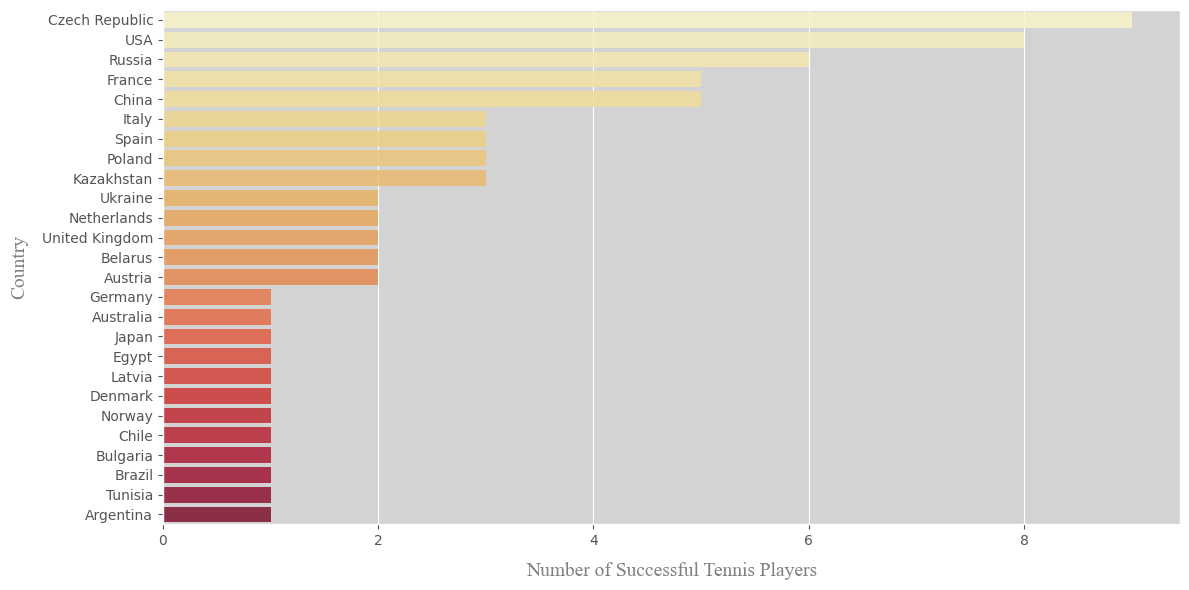

In [116]:
fig, ax1 = plt.subplots(figsize=(12, 6))

sns.barplot(y=country_players.index, x=country_players.values, hue=country_players.index, palette="YlOrRd", alpha=0.85, legend=False)

ax1.set_facecolor("lightgray")
ax1.set_xlabel("Number of Successful Tennis Players", fontsize=14, color="gray", font="Times New Roman", labelpad=10)
ax1.set_ylabel("Country", fontsize=14, color="gray", font="Times New Roman", labelpad=10)

plt.tight_layout()
plt.show()

The top countries with the most players ranked in the **top 100** are:

- 1. **Czech Republic** (9 players)

- 2. **USA** (8 players)

- 3. **Russia** (6 players)

- 4. **France and China** (5 players each)

# 7. What is the average number of aces per match?

Let's derive number of aces per match by summing `home_value` and `away_value` in `statistics` dataframe for aces. 

In [117]:
aces = statistics[(statistics["statistic_name"] == "aces") & (statistics["period"] == "ALL")]
average_aces = (aces["home_value"] + aces["away_value"])
average_aces.describe().reset_index(name="stat")

,index,stat
0,count,209.000000
1,mean,4.009569
2,std,4.428916
3,min,0.000000
4,25%,1.000000
5,50%,3.000000
6,75%,5.000000
7,max,34.000000


**Ace Statistics in Matches**
- **Typical Range**: 0 – 5 aces per match

- **Average**: 4 aces per match

- **Outliers**: Some extreme cases (e.g., 34 aces)

# 8. Is there a difference in the number of double faults based on gender?


let's compare men and women and figure out which one performed better, so we can compare thier double faults.   
double faults statistics are available in the `statistics` dataframe.

In [118]:
double_faults = statistics[(statistics["statistic_name"] == "double_faults") & (statistics["period"] == "ALL")]
double_faults = double_faults.merge(match_hometeam, on="match_id")
double_faults["home_stat"] = double_faults["home_stat"].astype(int)

females = double_faults[double_faults["gender"] == "F"]["home_stat"]
males = double_faults[double_faults["gender"] == "M"]["home_stat"]

double_faults.groupby("gender").agg({"home_stat":["min","max","mean"]})

home_stat              
             min max      mean
gender                        
F              0  12  3.760417
M              0   7  2.619718

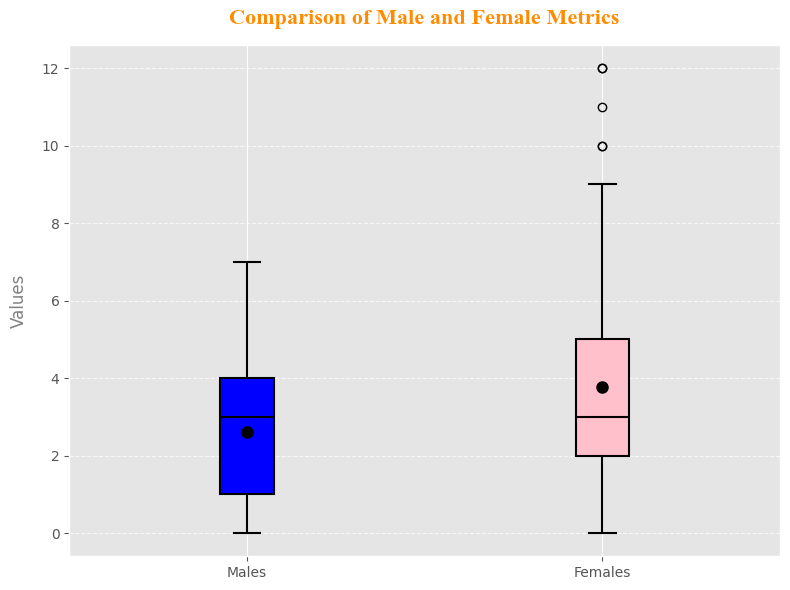

In [119]:
colors = ["blue", "pink"]

fig, ax2 = plt.subplots(figsize=(8, 6))
ax2 = plt.boxplot([males, females], labels=["Males", "Females"], showmeans=True, patch_artist=True, 
                  meanprops={"marker": "o", "markerfacecolor": "black", "markeredgecolor": "black", "markersize": 8},
                  boxprops={"linewidth": 1.5}, 
                  whiskerprops={"linewidth": 1.5},
                  capprops={"linewidth": 1.5,},
                  medianprops={"color": "black", "linewidth": 1.5})

for patch, color in zip(ax2['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_edgecolor("black") 

plt.title("Comparison of Male and Female Metrics", font="Times New Roman", fontsize=16, fontweight="bold", color="darkorange", pad=15)
plt.ylabel("Values", fontsize=12, color="gray", labelpad=10)
plt.grid(axis="y", linestyle="--", alpha=0.7) 

plt.tight_layout()
plt.show()

### Performance Comparison: Men vs. Women

The data clearly shows that **men performed better** in this analysis.  

#### Key Statistics:
- **Average double faults**:  
  - Men: **2.6**  
  - Women: **3.7**  

The box plot illustrates the scatter of the data, further highlighting the performance difference between genders.

# 9. Which player has won the most tournaments in a single month?

i'm not sure about this question but i found winner of each tournaments in question 19

# 10. Is there a correlation between a player's height and their ranking?

Let's use hypothesis test and spearman correlation to understand the connection between player's height and their ranking.

In [120]:
cleaned_all_players = all_players.dropna(axis=0, subset="height")
corr, p_value = spearmanr(cleaned_all_players["height"], cleaned_all_players["current_rank"])

print(f"Spearman Correlation Coefficient: {corr:.3f}")
print(f"P-value: {p_value:.3f}")
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

Spearman Correlation Coefficient: 0.076
P-value: 0.164
The correlation is not statistically significant.


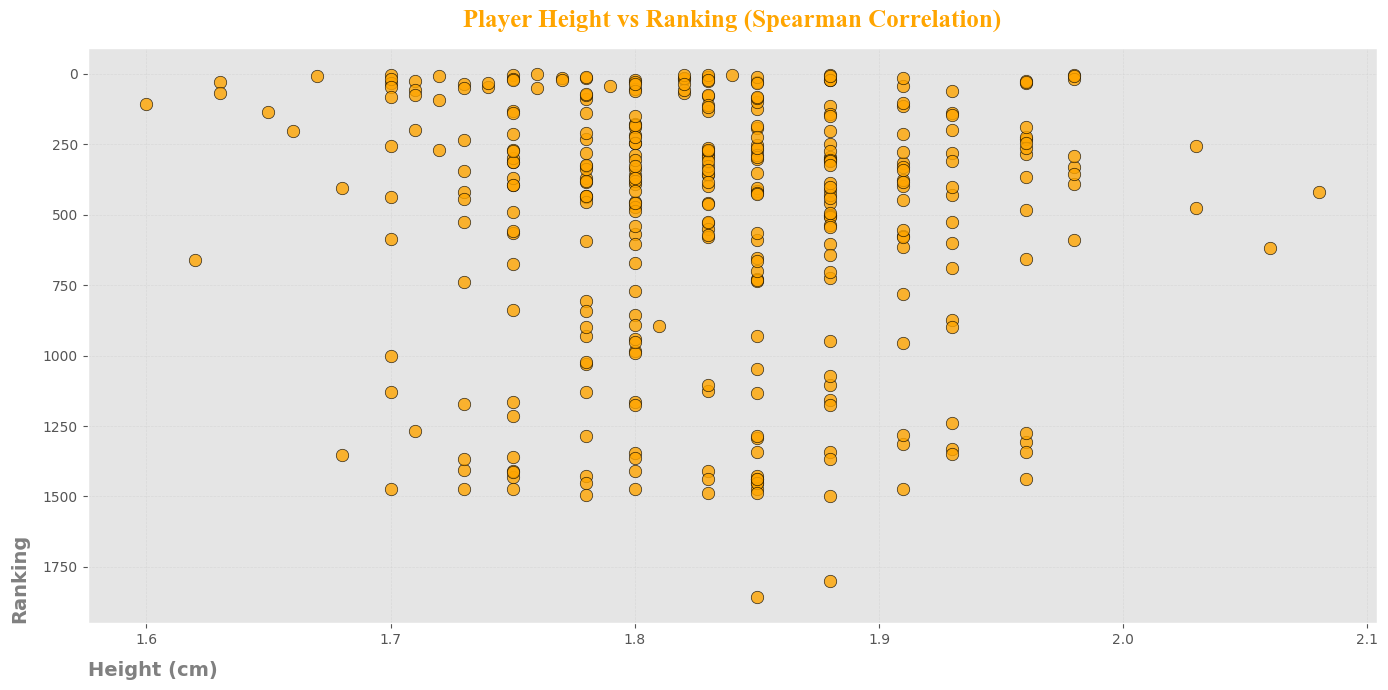

In [121]:
fig = plt.figure(figsize=(14, 7))
ax3 = plt.scatter(
    cleaned_all_players["height"],
    cleaned_all_players["current_rank"],
    color="orange",
    edgecolor="black",  # Add border to the markers for contrast
    alpha=0.8,  # Slight transparency for better visibility
    s=80  # Increase marker size for better visibility
)

plt.xlabel('Height (cm)', fontsize=14, loc='left', color="gray", labelpad=10, fontweight="bold")
plt.ylabel('Ranking', fontsize=14, loc="bottom", color="gray", labelpad=10, fontweight="bold")
plt.title(
    'Player Height vs Ranking (Spearman Correlation)',
    color="orange",
    fontsize=18,
    fontweight="bold",
    fontname="Times New Roman",
    pad=15
)

plt.grid(color="lightgray", linestyle="--", linewidth=0.5, alpha=0.7)

plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


### Statistical Analysis  

#### Hypothesis Test  
- **Test Used**: Spearman's rank correlation  
- **Result**: No significant relationship was detected  
  *(p = [0.164])*  

#### Visual Confirmation  
The scatter plot further supports this conclusion, with data points exhibiting no clear pattern or trend.  

A **Spearman correlation** analysis failed to reject the null hypothesis (ρ ≈ 0, p = [0.164]), indicating no monotonic relationship. This aligns with the scatter plot's random dispersion, suggesting independence between variables.  

# 11. What is the average duration of matches?


Compute the average match duration using the `total_time` dataframe.

In [122]:
average_time = total_time[total_time["time"] != 0]
average_time["time"].mean()

6023.8875

as you can see the average is **6023** seconds.

# 12. What is the average number of games per set in men's matches compared to women's matches?


There are several dateframes that can be used to calculate number of games per set. I use `power`.

In [123]:
mean_game = (
    power.groupby(["match_id", "set_num"])["game_num"].max()
    .groupby("match_id").mean()
    .reset_index()
    .merge(all_players, on="match_id")
)

males = mean_game.loc[mean_game["gender"] == "M", "game_num"]
females = mean_game.loc[mean_game["gender"] == "F", "game_num"]

print(f"{males.describe().reset_index(name='men_stat')}\n\n{females.describe().reset_index(name='women_stat')}")

   index   men_stat
0  count  64.000000
1   mean   9.007812
2    std   1.836200
3    min   3.000000
4    25%   8.000000
5    50%   9.000000
6    75%  10.000000
7    max  13.000000

   index  women_stat
0  count  125.000000
1   mean    8.760000
2    std    1.715338
3    min    3.500000
4    25%    8.000000
5    50%    9.000000
6    75%    9.500000
7    max   12.500000


Now we can see statistics for each gender, but for better comparison let's draw a box plot.

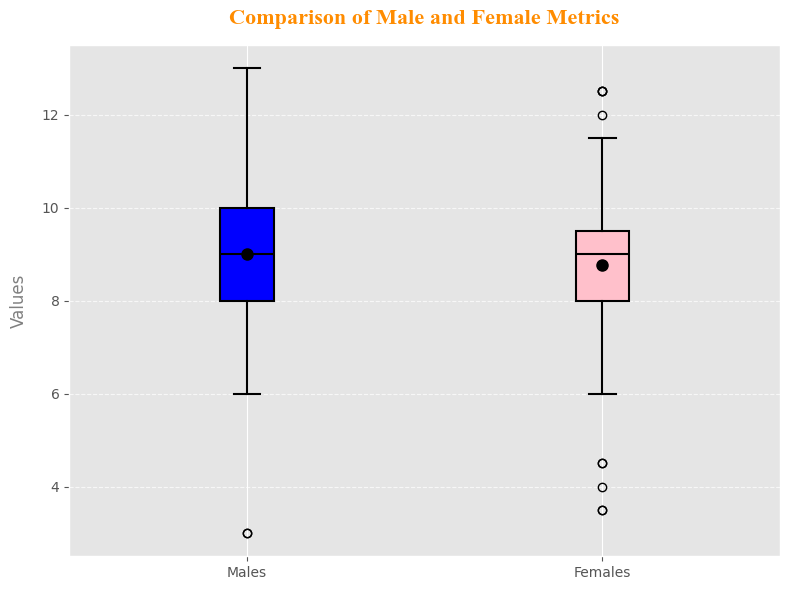

In [124]:
colors = ["blue", "pink"]

fig, ax4 = plt.subplots(figsize=(8, 6))
ax4 = plt.boxplot([males, females], labels=["Males", "Females"], showmeans=True, patch_artist=True, 
                  meanprops={"marker": "o", "markerfacecolor": "black", "markeredgecolor": "black", "markersize": 8},
                  boxprops={"linewidth": 1.5}, 
                  whiskerprops={"linewidth": 1.5},
                  capprops={"linewidth": 1.5,},
                  medianprops={"color": "black", "linewidth": 1.5})

for patch, color in zip(ax4['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_edgecolor("black") 

plt.title("Comparison of Male and Female Metrics", font="Times New Roman", fontsize=16, fontweight="bold", color="darkorange", pad=15)
plt.ylabel("Values", fontsize=12, color="gray", labelpad=10)
plt.grid(axis="y", linestyle="--", alpha=0.7) 

plt.tight_layout()
plt.show()

On average, **men played more games per set than women**, though the difference was minimal. 

# 13. What is the distribution of left-handed versus right-handed players?

In [125]:
all_players.groupby("plays").size().reset_index(name="count")

,plays,count
0,left-handed,32
1,right-handed,244


### Player Handedness Distribution

| Handedness      | Count | Percentage (of known) |
|-----------------|-------|-----------------------|
| **Right-handed** | 244   | 88.4%                 |
| **Left-handed**  | 32    | 11.6%                 |

*Percentages calculated from players with known handedness data.*

# 14. What is the most common type of surface used in tournaments?

Determine the distribution of surface types by analyzing the `ground_type` column in the `match_tournament` dataframe."

In [126]:
surface_type = match_tournament.groupby("ground_type").size().sort_values(ascending=False).reset_index(name="count")
surface_type

,ground_type,count
0,Hardcourt outdoor,336
1,Red clay,323
2,Hardcourt indoor,84
3,Carpet indoor,3
4,Synthetic outdoor,1


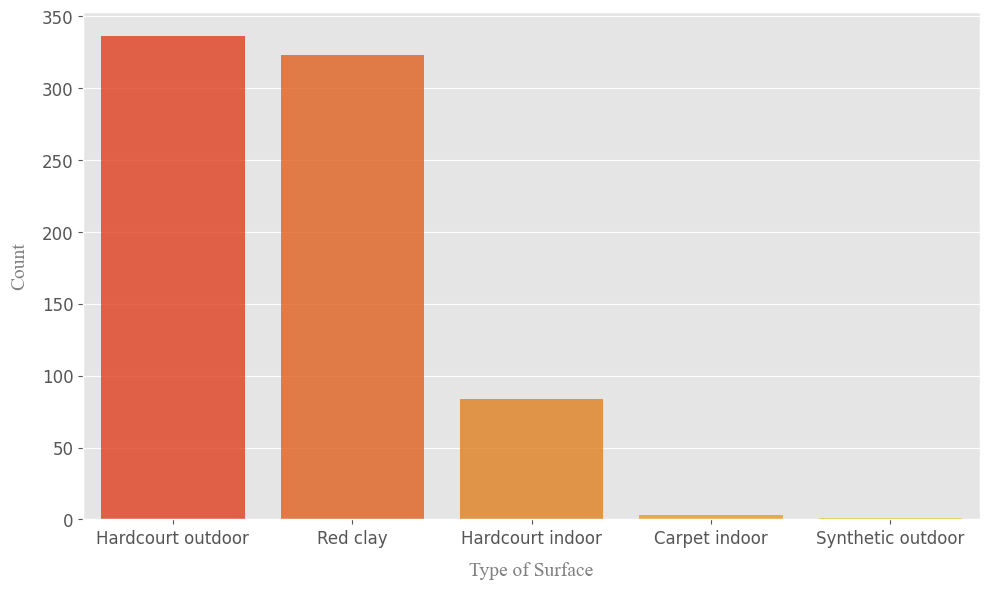

In [127]:
fig, ax5 = plt.subplots(figsize=(10, 6))

ax5 = sns.barplot(x=surface_type["ground_type"], y=surface_type["count"], hue=surface_type["ground_type"], palette="autumn", alpha=0.8)

ax5.set_xlabel("Type of Surface", fontsize=14, color="gray", fontfamily="Times New Roman", labelpad=10)
ax5.set_ylabel("Count", fontsize=14, color="gray", fontfamily="Times New Roman", labelpad=10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

### Most Commonly Used Court Surfaces in Professional Tournaments

- **Hardcourt (Outdoor)** – 336 tournaments  
  *The predominant surface type globally.*

- **Red Clay** – 323 tournaments  
  *Nearly as popular as outdoor hardcourt.*

- **Hardcourt (Indoor)** – 84 tournaments  
  *Significantly less common than outdoor variants.*

## 15. How many distinct countries are represented in the dataset? 

In [128]:
print(all_players["country"].unique(),"\n",len(all_players["country"].unique()))

['Argentina' 'Brazil' 'Spain' 'USA' 'United Kingdom' 'Jordan'
 'Czech Republic' 'France' 'Kazakhstan' 'Serbia' 'Austria' 'Russia'
 'Chile' 'Italy' 'Bulgaria' 'Norway' 'Australia' 'Latvia' 'Estonia'
 'Poland' 'China' 'Netherlands' 'Ukraine' 'Canada' 'Ecuador' 'Mexico'
 'Japan' 'Egypt' 'Tunisia' 'Slovakia' 'Lithuania' 'North Macedonia'
 'Bosnia & Herzegovina' 'Germany' 'Slovenia' 'Croatia' 'Switzerland'
 'India' 'Peru' 'Denmark' 'Luxembourg' 'Venezuela' 'Portugal' 'Nigeria'
 'Algeria' 'Ivory Coast' nan 'Belarus' 'Uruguay' 'Chinese Taipei' 'Turkey'
 'Sweden' 'Colombia' 'Belgium' 'Romania' 'Monaco' 'Dominican Republic'
 'Morocco' 'Uzbekistan' 'Ireland' 'Israel' 'New Zealand' 'South Korea'
 'Jamaica' 'Bolivia' 'Moldova' 'Thailand' 'South Africa' 'Zimbabwe'
 'Vietnam' 'Greece'] 
 71


**71 distinct countries** are represemted in the dataset.

## 16. Which player has the highest winning percentage against top 10 ranked opponents? 

### Approach:
1. **Merge match data** from both perspectives:
   - Combine `match_awayteam` and `match_hometeam` to capture all matches
2. **Filter for top 10 ranked players** in the combined dataset
3. **Determine match winners** by cross-referencing with the `winners` dataframe

### Implementation Notes:
- This ensures we capture all matches where a top 10 player participated, regardless of whether they were home or away
- The `winners` dataframe provides the authoritative result for each match


In [129]:
matches = (
    match_awayteam.merge(match_hometeam, on="match_id")
    .query("current_rank_x < 11 or current_rank_y < 11")
)

winners = pd.concat([
    matches[matches["player_id_x"].isin(all_winners["player_id"])]
    .query("current_rank_y < 11")[["name_x", "current_rank_x", "name_y", "current_rank_y"]],
    
    matches[matches["player_id_y"].isin(all_winners["player_id"])]
    .query("current_rank_x < 11")[["name_y", "current_rank_y", "name_x", "current_rank_x"]]
    .rename(columns={
        "name_y": "name_x",
        "current_rank_y": "current_rank_x",
        "name_x": "name_y",
        "current_rank_x": "current_rank_y"
    })
])
winners

,name_x,current_rank_x,name_y,current_rank_y
22,Dimitrov G.,14.0,Rune H.,8.0
23,Ruud C.,11.0,Alcaraz C.,2.0
46,Kalinina A.,27.0,Vondroušová M.,7.0
63,Andreeva M.,57.0,Krejčíková B.,10.0
10,Kudermetova V.,19.0,Pegula J.,5.0
21,Dimitrov G.,14.0,Sinner J.,4.0


In [130]:
win_count = winners.groupby("name_x").size().reset_index(name="wins")
win_count

,name_x,wins
0,Andreeva M.,1
1,Dimitrov G.,2
2,Kalinina A.,1
3,Kudermetova V.,1
4,Ruud C.,1


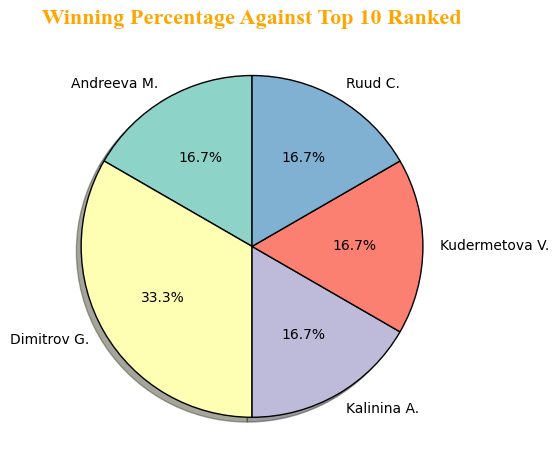

In [131]:
colors = plt.cm.Set3(range(len(win_count["wins"])))

fig, ax6 = plt.subplots()
ax6.pie(
    win_count["wins"],
    labels=win_count["name_x"],
    autopct="%1.1f%%",
    colors=colors,
    shadow=True,
    startangle=90,
    wedgeprops={"edgecolor": "black", "linewidth": 1} 
)

plt.title("Winning Percentage Against Top 10 Ranked", color="orange", font="Times New Roman", fontsize=16, fontweight="bold", )

plt.tight_layout()
plt.show()

### Key Finding:
- **Dimitrov G.** leads all players with:
  - **2 wins** against top 10 opponents
  - Highest winning percentage in this category

### Supplementary Information:
For complete performance details across all players, refer to the accompanying visualization.

## 17. What is the average number of breaks of serve per match?

The number of breaks of serve per match can be obtained from:
- **Dataframe**: `power`
- **Column**: `break_occurred`

In [132]:
breaks = power.groupby(["match_id"])["break_occurred"].sum().reset_index(name="breaks")["breaks"]
breaks.describe().reset_index(name="stat")

,index,stat
0,count,178.000000
1,mean,7.157303
2,std,3.019331
3,min,0.000000
4,25%,5.000000
5,50%,6.000000
6,75%,9.000000
7,max,16.000000


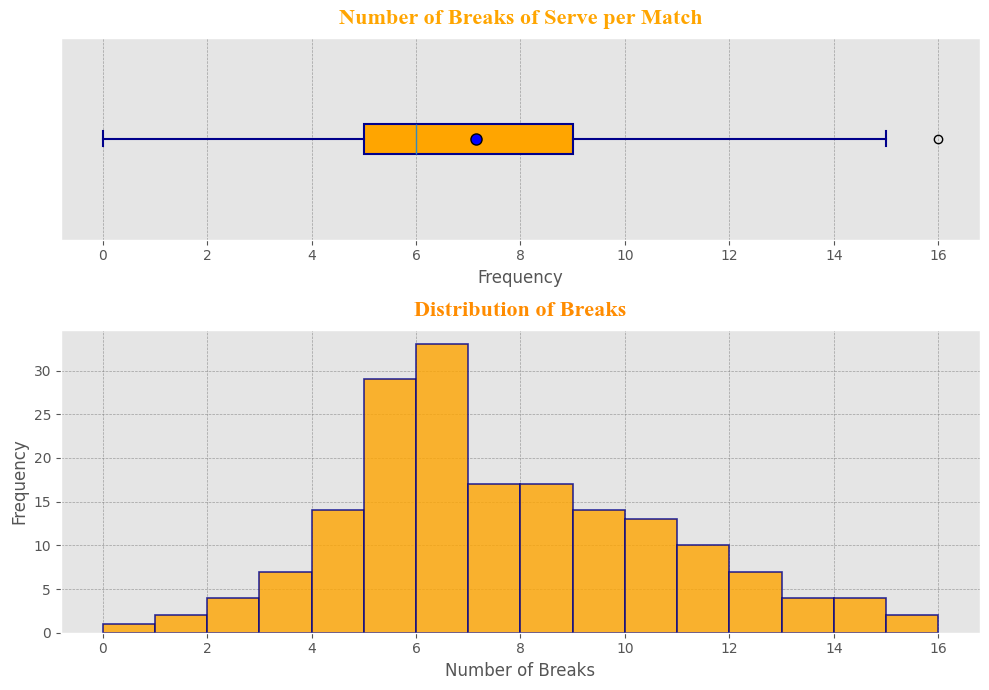

In [133]:
fig, (ax7, ax8) = plt.subplots(2, 1, figsize=(10, 7), gridspec_kw={'height_ratios': [1, 1.5]})

box = ax7.boxplot(breaks, vert=False, patch_artist=True, showmeans=True,
                  meanprops={"marker": "o", "markerfacecolor": "blue", "markeredgecolor": "black", "markersize": 8},
                  boxprops={"facecolor": "orange", "edgecolor": "darkblue", "linewidth": 1.5},
                  whiskerprops={"color": "darkblue", "linewidth": 1.5},
                  capprops={"color": "darkblue", "linewidth": 1.5})

ax7.set_title("Number of Breaks of Serve per Match", color="orange",font="Times New Roman", fontsize=16, fontweight="bold", pad=10)
ax7.set_xlabel("Frequency", fontsize=12)
ax7.set_yticks([])  
ax7.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.7)

ax8.hist(breaks, color="orange", alpha=0.8, bins=16, edgecolor="darkblue", linewidth=1.2)
ax8.set_title("Distribution of Breaks", color="darkorange", font="Times New Roman", fontsize=16, fontweight="bold", pad=10)
ax8.set_xlabel("Number of Breaks", fontsize=12)
ax8.set_ylabel("Frequency", fontsize=12)
ax8.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()

## Serve Break Analysis

### Key Statistics:
- **Mean breaks per match**: 7 ± 3 (mean ± SD)
- **68% confidence interval**: 4–10 breaks
  - *This follows the empirical rule for normal distributions*
- **Mode**: 6 breaks (most frequent occurrence)

### Visualization:
The distribution chart above clearly shows:
- The central tendency around 6–7 breaks
- The spread of break counts across matches

### Interpretation:
While matches average 7 breaks, there's considerable variation (SD = 3), with most matches clustering around 6 breaks.

## 18. Check out the successful players in recent years.

We defined professional status `turned pro` as our primary indicator of success.   
In this dataset the last players which turned pro, they've turned pro in 2019, so we check these players. 

In [134]:
all_players[all_players["turned_pro"].isin([2019])]

,match_id,name,slug,gender,user_count,residence,birthplace,height,weight,plays,turned_pro,current_prize,total_prize,player_id,current_rank,name_code,country,full_name
20,11675444,Musetti L.,musetti-lorenzo,M,22366,Carrara,"Carrara, Italy",1.85,75.0,right-handed,2019.0,1598590.0,3901074.0,261015,27.0,MUS,Italy,"Musetti, Lorenzo"
25,11675449,Davidovich Fokina A.,davidovich-fokina-alejandro,M,8793,Fuengirola,"Malaga, Spain",1.83,80.0,right-handed,2019.0,1509026.0,4476749.0,157456,26.0,DAV,Spain,"Davidovich Fokina, Alejandro"
624,11699814,Cozbinov A.,cozbinov-alexander,M,214,"Las Vegas, USA","Chisinau, Moldova",1.88,79.0,right-handed,2019.0,16362.0,82729.0,107351,543.0,COZ,Moldova,"Cozbinov, Alexander"


In [135]:
all_winners[all_winners["player_id"].isin([261015,157456,107351])]

,match_id,name,slug,gender,user_count,residence,birthplace,height,weight,plays,turned_pro,current_prize,total_prize,player_id,current_rank,name_code,country,full_name
238,11699814,Cozbinov A.,cozbinov-alexander,M,214,"Las Vegas, USA","Chisinau, Moldova",1.88,79.0,right-handed,2019.0,16362.0,82729.0,107351,543.0,COZ,Moldova,"Cozbinov, Alexander"


### Players
- **🇮🇹 Musetti L.**
  - Turned pro: 2019
  - Current rank: #27 (📈 Top 30)
- **🇪🇸 Davidovich Fokina A.**
  - Turned pro: 2019
  - Current rank: #26 (📈 Top 30)
- **🇲🇩 Cozbinov A.**
  - Turned pro: 2019
  - Key stat: Only cohort member with recorded match wins

### Performance Breakdown

| Metric              | Musetti L. | Davidovich Fokina A. | Cozbinov A. |
|---------------------|------------|-----------------------|-------------|
| Years Pro           | 5          | 5                     | 5           |
| Current Rank        | #27        | #26                   | 543         |
| Match Wins Recorded | 0*         | 0*                    | 1+          |

*Dataset may have incomplete win records

### Key Findings
1. **Ranking Success**
   - Both Musetti and Davidovich Fokina have broken into the **Top 30**
   - Indicates strong development trajectory

2. **Match Performance**
   - Cozbinov shows competitive results with match wins
   - Other players' win data may require additional sources

## 19. Who's the winner of each tournament?

### Objective:
Identify championship matches and determine winners across all tournaments.

### Data Sources:
- `match_round`: Contains round information for each match
- `all_winners`: Contains match outcome data
- `match_tournament`: Contains tournament-level match identifiers

In [136]:
tournament_winners = all_winners.merge(match_round, on="match_id")
tournament_winners = tournament_winners[tournament_winners["name_y"] == "Final"]
tournament_winners = tournament_winners[["match_id","name_x"]].merge(match_tournament, on="match_id")
tournament_winners[["tournament_name","name_x"]]

,tournament_name,name_x
0,"Bogota, Colombia",Tirante T.
1,"Orleans, France",Machač T.
2,"Tokyo, Japan",Kudermetova V.
3,"Sharm ElSheikh, Singles Main, W-ITF-EGY-14A",Kubka M.
4,"Monastir, Singles Main, M-ITF-TUN-43A",Cid Subervi R.
5,"Santarem, Singles Main, W-ITF-POR-15A",Guerrero Álvarez E.
6,"Lujan, Singles Main, W-ITF-ARG-09A",Janicijevic S.
7,"Hilton Head, SC, Singles Main, W-ITF-USA-43A",Biolay S.
8,"Templeton, CA, Singles Main, W-ITF-USA-42A",Townsend T.
9,"Braga, Portugal",Roca Batalla O.


## 20. Most of the games were played in which country?

In [137]:
country_played = match_venue.groupby("country").size().sort_values(ascending=False)
country_played.head().reset_index(name="count_games")

,country,count_games
0,France,79
1,Tunisia,79
2,Argentina,75
3,Egypt,68
4,Spain,64


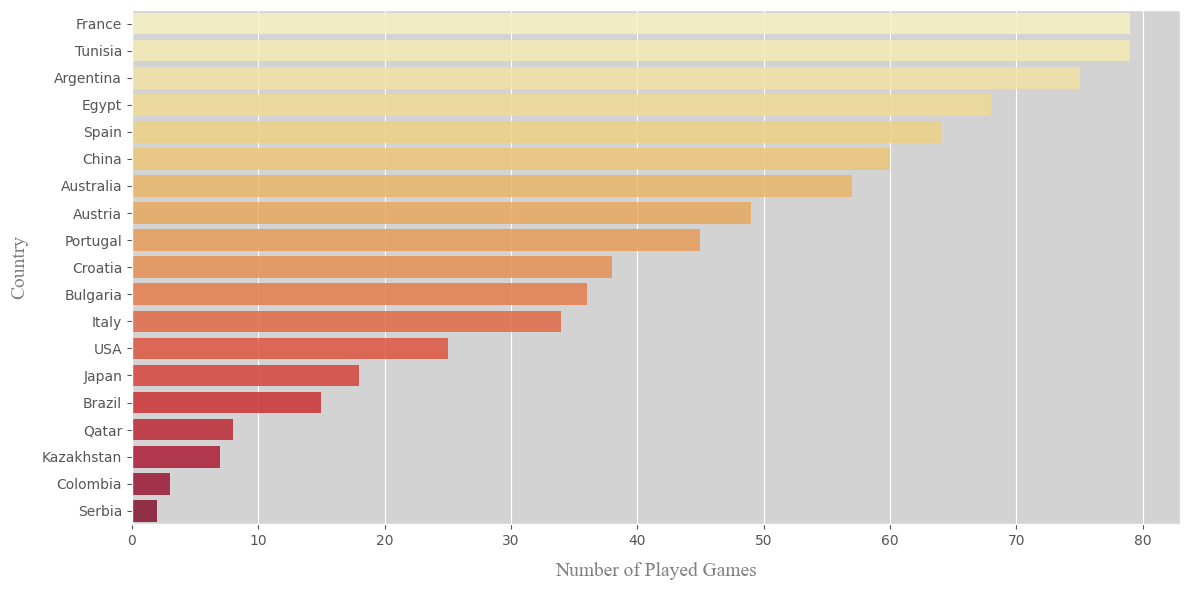

In [138]:
fig, ax9 = plt.subplots(figsize=(12, 6))

sns.barplot(y=country_played.index, x=country_played.values, hue=country_played.index, palette="YlOrRd", alpha=0.85, legend=False)

ax9.set_facecolor("lightgray")
ax9.set_xlabel("Number of Played Games", fontsize=14, color="gray", font="Times New Roman", labelpad=10)
ax9.set_ylabel("Country", fontsize=14, color="gray", font="Times New Roman", labelpad=10)

plt.tight_layout()
plt.show()

**Countries with the most matches played:**
- 1. **France** – 79 matches
- 1. **Tunisia** – 79 matches (*tied with France*)
- 3. **Argentina** – 75 matches


## 21. Number of stadiums in each country.

In [139]:
stadium_counts = match_venue.groupby('country')['stadium'].nunique().sort_values(ascending=False)
stadium_counts.columns = ['Country', 'Number of Stadiums']
stadium_counts.head().reset_index(name="count_stadiums")

,country,count_stadiums
0,Argentina,12
1,China,11
2,Tunisia,9
3,Spain,9
4,Portugal,9


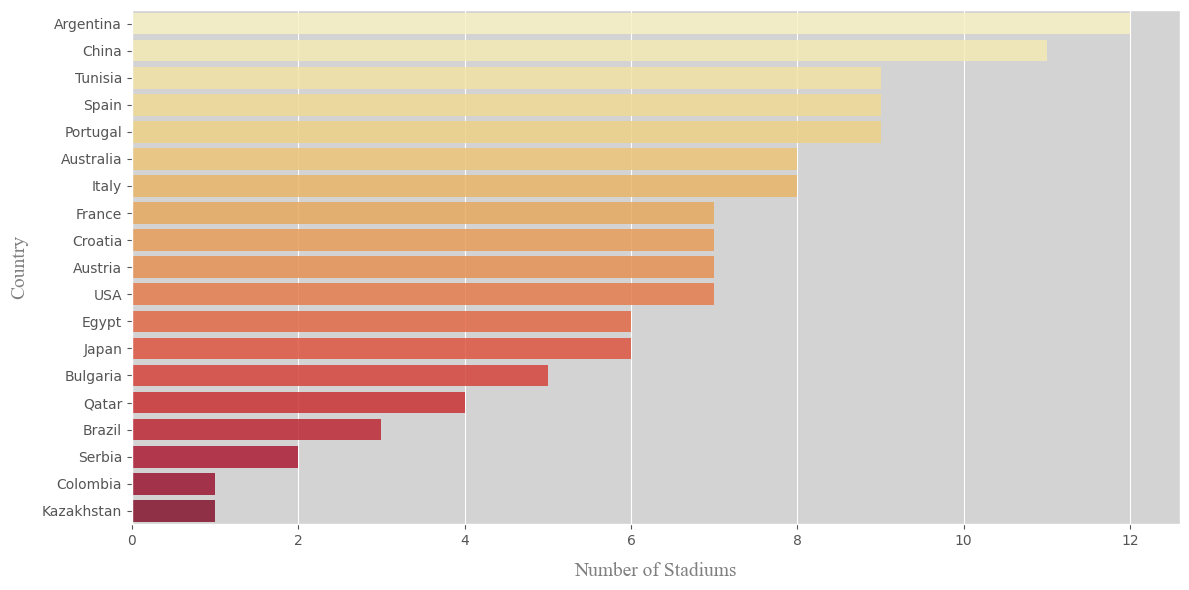

In [140]:
fig, ax10 = plt.subplots(figsize=(12, 6))

sns.barplot(y=stadium_counts.index, x=stadium_counts.values, hue=stadium_counts.index, palette="YlOrRd", alpha=0.85, legend=False)

ax10.set_facecolor("lightgray")
ax10.set_xlabel("Number of Stadiums", fontsize=14, color="gray", font="Times New Roman", labelpad=10)
ax10.set_ylabel("Country", fontsize=14, color="gray", font="Times New Roman", labelpad=10)

plt.tight_layout()
plt.show()

**Countries with the most stadiums utilized:**
- 1. **Argentina** – 12 stadiums
- 2. **China** – 11 stadiums
- 3. **Tunisia** – 9 stadiums


## 22. Which type of bet is more common?

In [141]:
count_bets = odds.groupby("market_name").size().sort_values(ascending=False)
count_bets.reset_index(name="count")

,market_name,count
0,full_time,630
1,first_set_winner,110
2,total_games_won,108


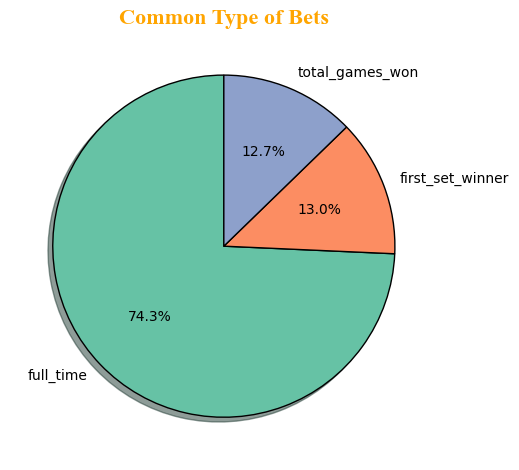

In [142]:
colors = plt.cm.Set2(range(len(count_bets)))

fig, ax11 = plt.subplots()
ax11.pie(
    count_bets,
    labels=count_bets.index,
    autopct="%1.1f%%",
    colors=colors,
    shadow=True,
    startangle=90,
    wedgeprops={"edgecolor": "black", "linewidth": 1} 
)

plt.title("Common Type of Bets", color="orange", font="Times New Roman", fontsize=16, fontweight="bold", )

plt.tight_layout()
plt.show()

### Market Breakdown by Wager Type

| Market Type          | Number of Bets | Market Share | Importance |
|----------------------|---------------:|-------------:|------------|
| **Full-Time Result** | 630            | 74.2%        | Primary    |
| **First Set Winner** | 110            | 13.0%        | Secondary  |
| **Total Games Won**  | 108            | 12.8%        | Secondary  |

**Total Bets Tracked:** 848

### Key Observations:
1. Market Dominance:
   - Full-Time Result commands **74.2%** of all wagers
   - Represents the primary betting focus

2. Secondary Markets:
   - Set-based (First Set Winner) and statistical (Total Games Won) markets show similar volumes
   - Combined account for 25.8% of total bets

3. Implications:
   - Bettors show strongest interest in match outcomes
   - Significant secondary interest in set-level and statistical markets

## 23. which type of bet has the lowest risk?

In [143]:
cleaned_odds = odds.dropna(subset="winnig")
winning_bets = cleaned_odds[cleaned_odds["winnig"] == True].groupby("market_name").size().sort_values(ascending=False)

((winning_bets / count_bets) * 100).reset_index(name="chance")

,market_name,chance
0,full_time,49.682540
1,first_set_winner,48.181818
2,total_games_won,48.148148


### Market Performance Metrics

| Market Name          | Win Chance (%) |
|----------------------|---------------:|
| **Full-Time Result** | 49.68          |
| **First Set Winner** | 48.18          |
| **Total Games Won**  | 48.15          |

### Key Insights:

1. **Competitive Odds**  
   - All markets show probabilities close to 50%  
   - Indicates balanced matchups across bet types  

2. **Market Comparison**  
   - Full-Time Result has slightly higher win chance (49.68%)  
   - Set/Games markets cluster around 48.15%  

3. **Implications**  
   - <49.7% win rate suggests slight bookmaker advantage  
   - Minimal variation (1.53%) between market types 

## 24. what is the average number of bets per match?

In [144]:
bets_permatch = odds.groupby("match_id").size().sort_values(ascending=False)
bets_permatch.describe().reset_index(name="stat")

,index,stat
0,count,315.000000
1,mean,2.692063
2,std,1.511243
3,min,2.000000
4,25%,2.000000
5,50%,2.000000
6,75%,2.000000
7,max,6.000000


### Statistical Summary of Bets per Match

| Statistic          | Value       |
|--------------------|------------:|
| **Match Count**    | 315         |
| **Mean Bets**      | 2.69 ± 1.51 |
| **Minimum**        | 2.00        |
| **25th Percentile**| 2.00        |
| **Median**         | 2.00        |
| **75th Percentile**| 2.00        |
| **Maximum**        | 6.00        |

### Key Observations:

1. **Central Tendency**
   - Most matches (75%) have exactly **2 bets**
   - Mean of 2.69 bets indicates slight right skew

2. **Variability**
   - Standard deviation of 1.51 shows moderate dispersion
   - Range spans from 2 to 6 bets per match

3. **Distribution Shape**
   - 50% of matches cluster at the minimum (2 bets)
   - Long tail with some matches attracting up to 6 bets